### 1. 서로소 집합 자료구조
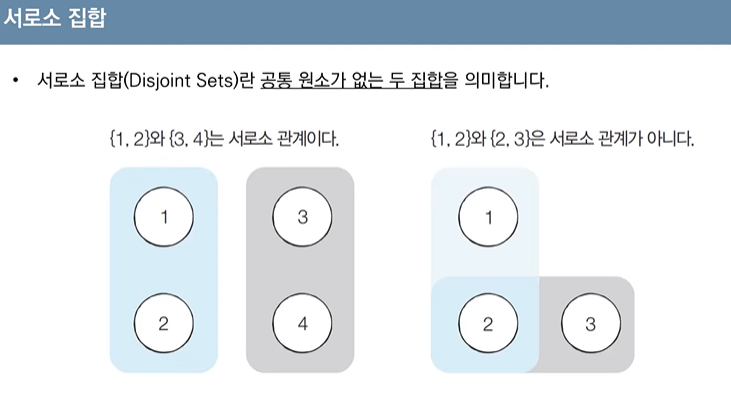

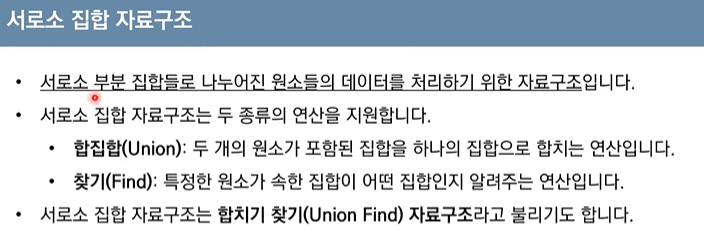

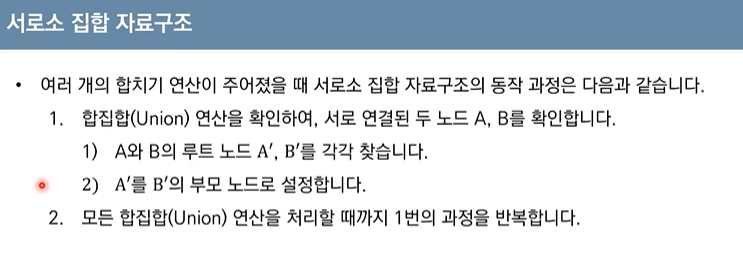

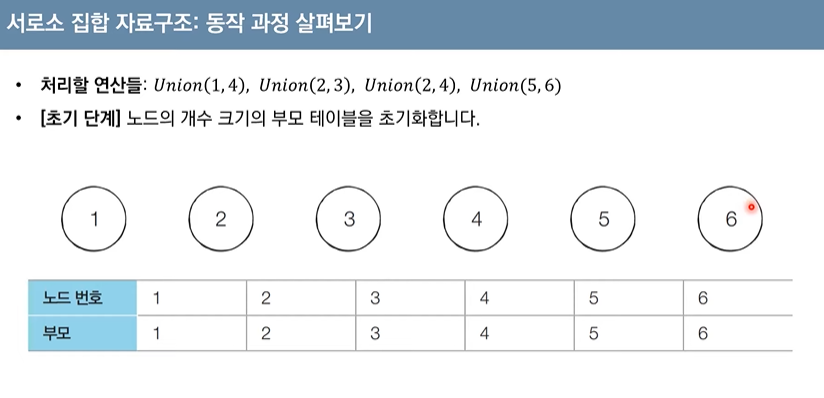

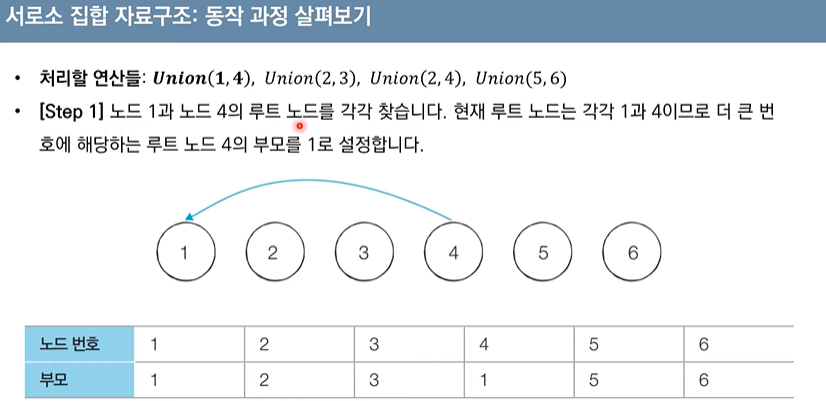
##### 이어서 Union(2,3) Union(2,4), Union(5,6) 연산을 진행
##### Union(2,4)는 이전단계 작업으로 부모노드가 2인데, 4의 부모노드가 더 작으므로 1로 바꾼다

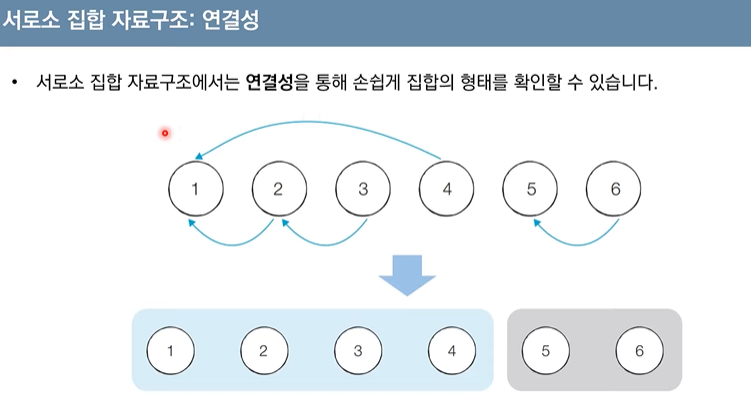
##### 왼쪽: 루트를 1로 가진 집합
##### 오른쪽: 루트를 4로 가진 집합


#### 서로소 집합 자료구조 구현

In [ ]:
def find(parent, x):
    if parent[x] != x:
        # 성능을 위해 경로압축 ver
        parent[x] = find(parent,parent[x])
    return parent[x]
#         return find(parent,parent[x])
    
def union(parent,a,b):
    a = find(parent,a)
    b = find(parent,b)
    if a<b :
        parent[b] = a
    else:
        parent[a] = b
        
v, e = map(int, input().split())
parent = [0] * (v+1)

for i in range(1,v+1):
    parent[i] = i
    
for _ in range(e):
    a, b = map(int, input().split())
    union(parent, a, b)
    
print(parent)

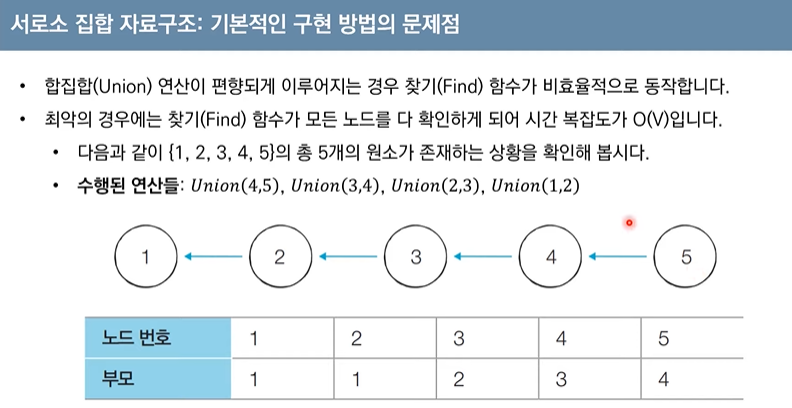
##### Node 5의 경우 부모를 찾기 위해 계속 find 하므로, 최악의 경우 O(V)시간 복잡도를 가진다.

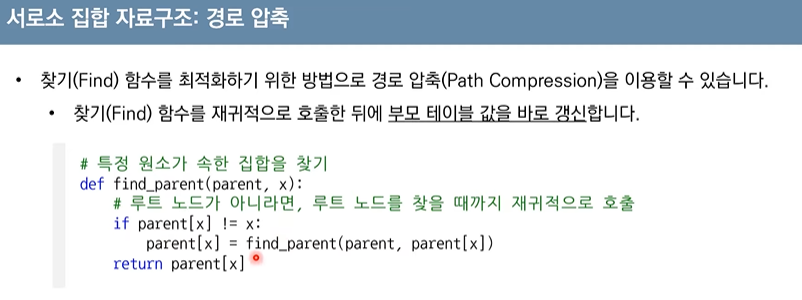
##### 따라서 find 함수를 수정해 최종 부모노드로 갱신할 필요가 있다.

#### 서로소 집합을 이용한 사이클 판별
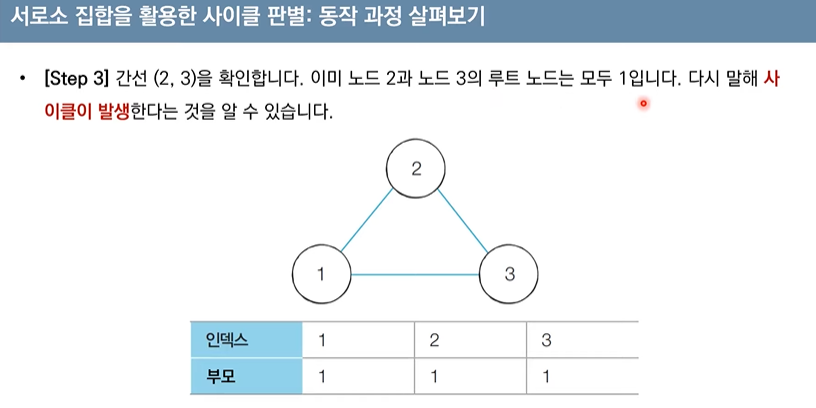

In [7]:
def find(parent, x):
    if parent[x] != x:
        parent[x] = find(parent,parent[x])
    return parent[x]
    
def union(parent,a,b):
    a = find(parent,a)
    b = find(parent,b)
    if a<b :
        parent[b] = a
    else:
        parent[a] = b
        
v, e = map(int, input().split())
parent = [0] * (v+1)

for i in range(1, v+1):
    parent[i] = i
    
cycle = False

for _ in range(e):
    a,b = map(int, input().split())
    if find(parent,a) == find(parent,b):
        cycle = True
        break
    else:
        union(parent,a,b)
        
if cycle:
    print("사이클 발생")
else: 
    print("사이클 발생 X")

3 3
1 2
2 3
1 3
사이클 발생


### 2. 최소신장트리
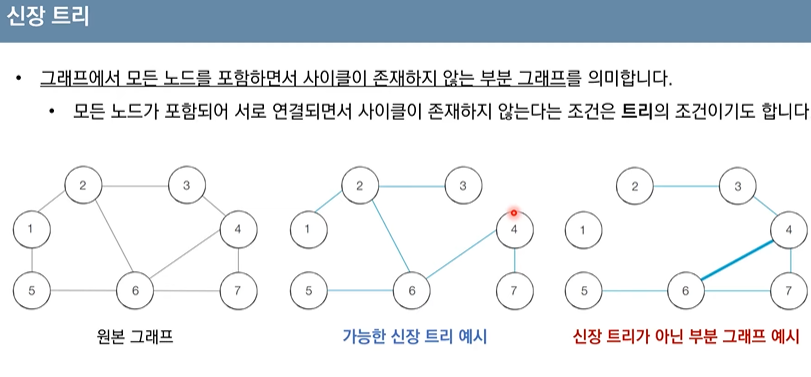

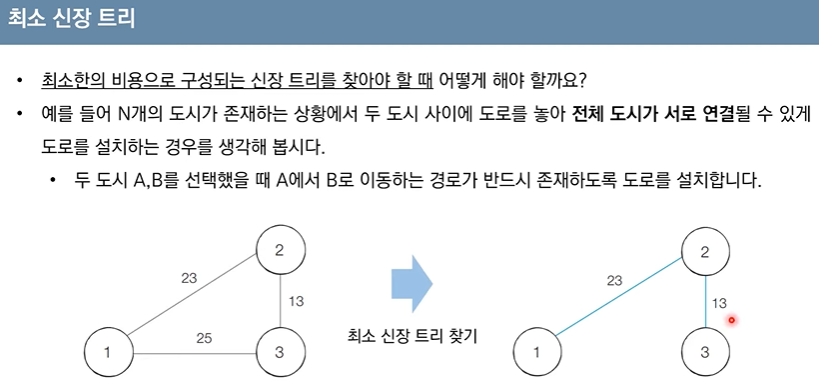

### 최소신장트리 - 크루스칼 알고리즘
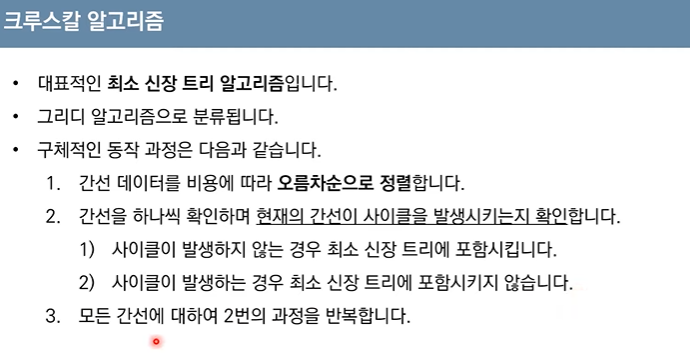

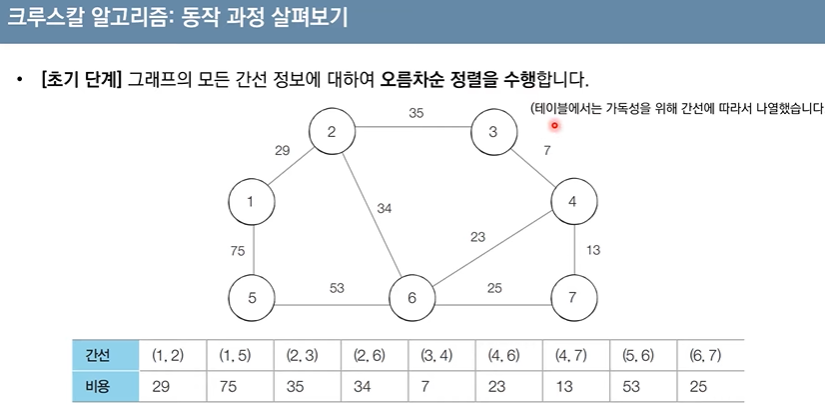
##### 비용에 대한 오름차순 정렬이 필요!

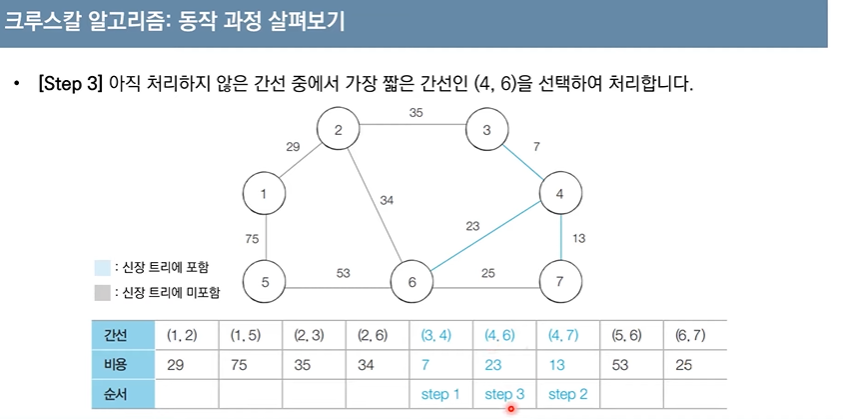
##### 사이클이 발생하지 않을때까지 추가!

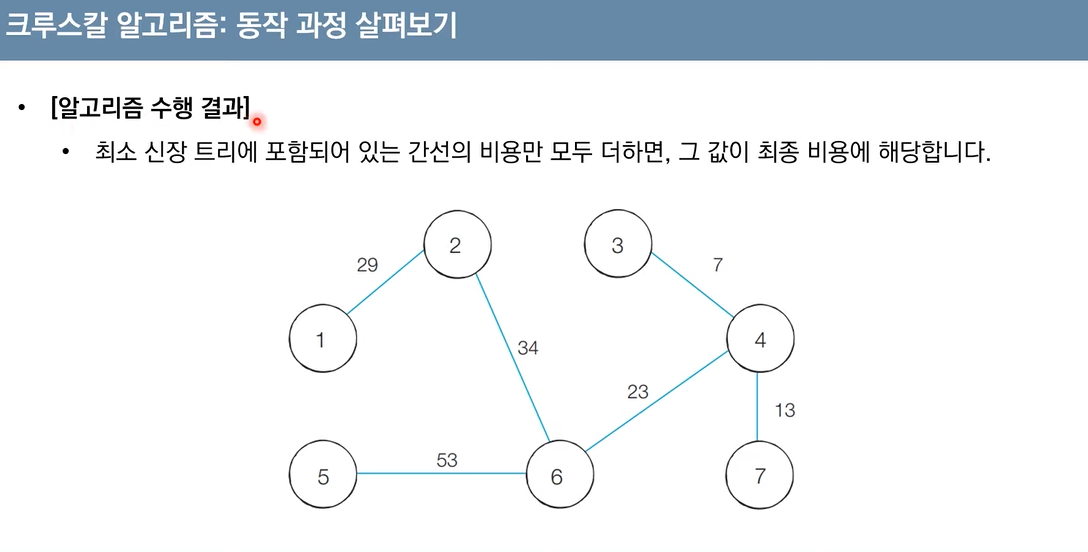

#### 크루스칼 알고리즘 구현

In [ ]:
def find(parent,x):
    if parent[x] != x:
        parent[x] = find(parent,parent[x])
    return parent[x]

def union(parent,a,b):
    A = find(parent,a)
    B = find(parent,b)
    if A < B:
        parent[b] = a
    else:
        parent[a] = b
        
v, e = map(int, input().split())
parent = [0] * (v+1)

edges, result = [], 0

for i in range(1,v+1):
    parent[i] = i

for _ in range(e):
    a, b, cost = map(int,input().split())
    edges.append((cost,a,b))

edges.sort()

for edge in edges:
    cost, a, b = edge
    if find(parent,a) != find(parent,b):
        union(parent,a,b)
        result+=cost
print(result)

### 3. 위상정렬
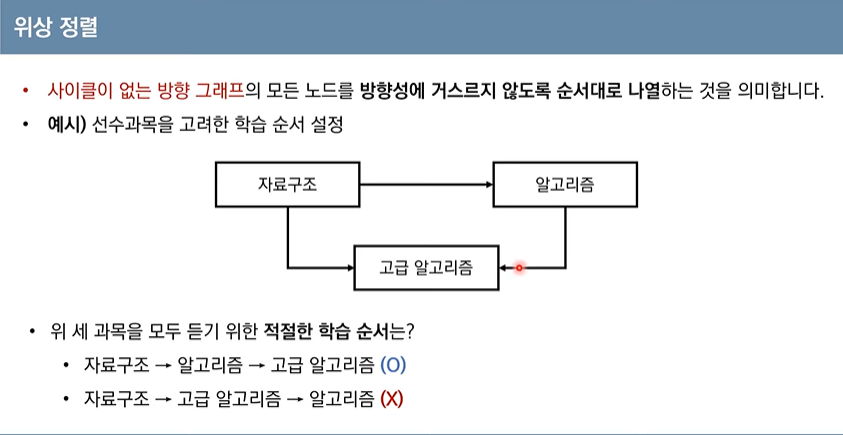

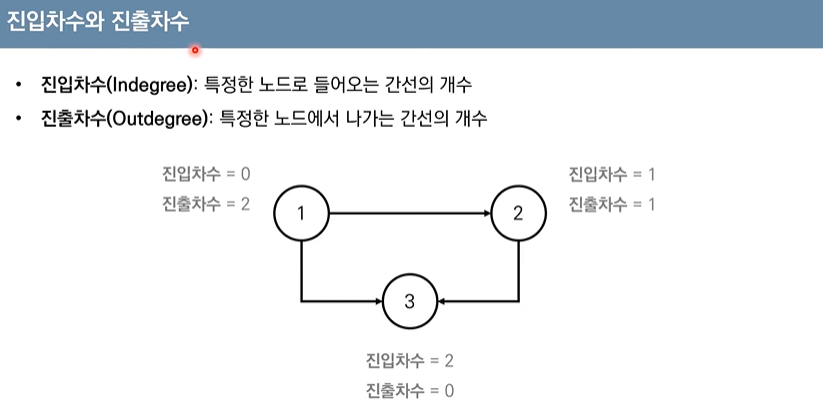
##### >>진입차수를 0인 노드를 찾는 idea에서 위상정렬 시작

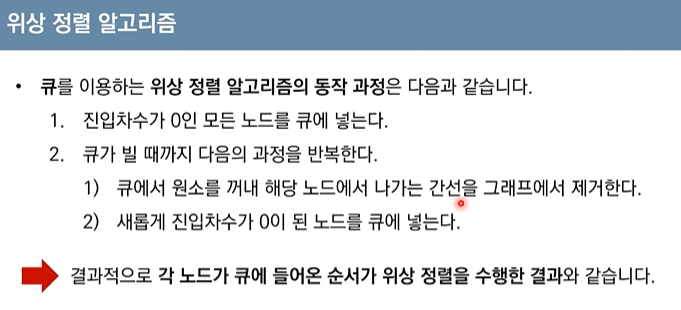

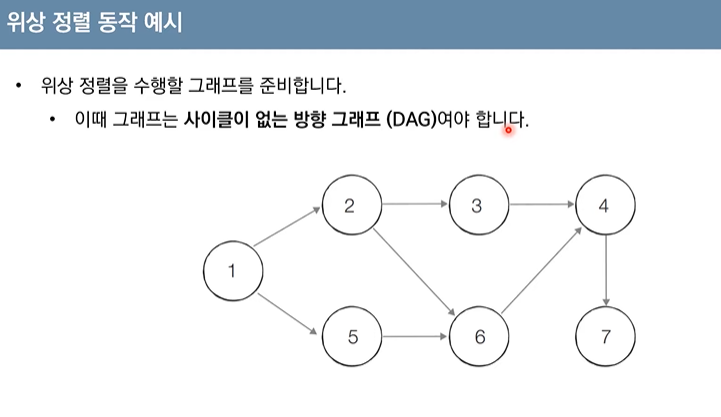

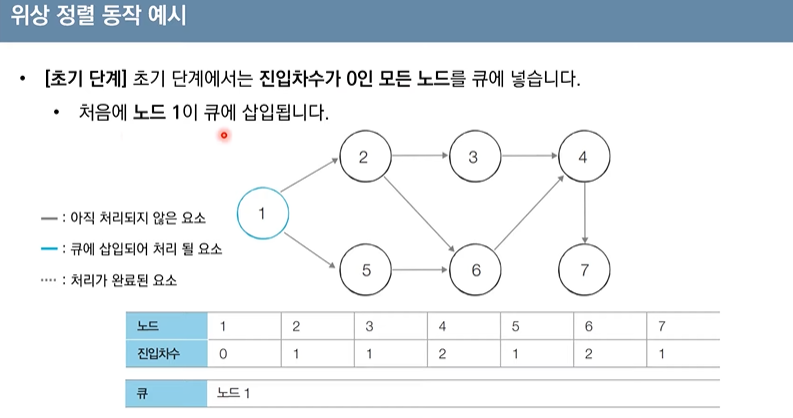
##### 진입차수가 0인 노드를 우선적으로 큐에 삽입, 또한 해당 노드의 진출 간선 제거

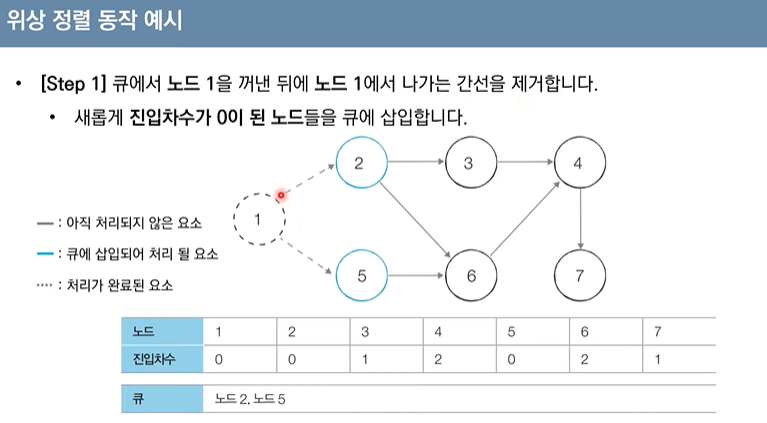
##### > 해당 과정 반복적으로 7까지 진행

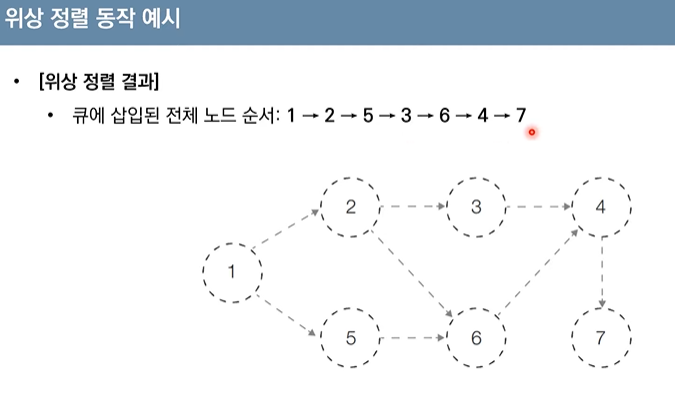

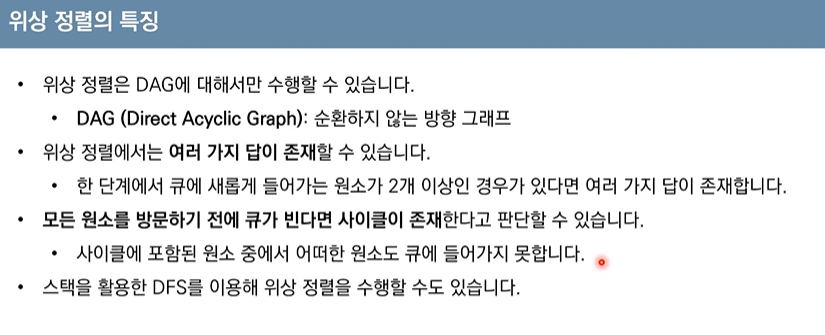

#### 위상정렬 알고리즘 구현

In [9]:
from collections import deque

v,e = map(int,input().split())

indegree = [0] * (v+1)

graph = [[] for i in range(v+1)]

for _ in range(e):
    a,b = map(int,input().split())
    graph[a].append(b)
    indegree[b] +=1
    
def topology_sort():
    result = []
    q = deque()
    for i in range(1, v+1):
        if indegree[i] ==0:
            q.append(i)
    while q:
        now = q.popleft()
        result.append(now)
        for i in graph[now]:
            indegree[i] -=1
            if indegree[i] == 0:
                q.append(i)
                
    for i in result:
        print(i, end=' ')
topology_sort()

7 8
1 2
1 5
2 3
2 6
3 6
3 4
4 7
5 6
1 2 5 3 6 4 7 

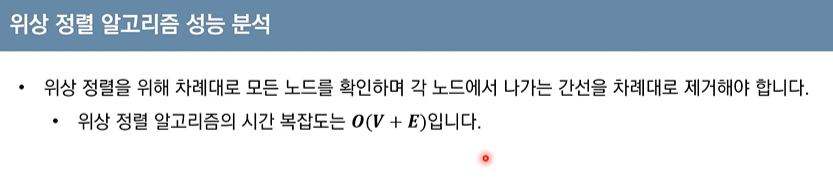
##### > 결론적인 시간복잡도는 O(V+E) 이다